# Pandas　―　データ分析
Pythonでのデータ解析の決定版とも言えるライブラリです。 特徴としては、
- 時系列データを扱うことに長けている
- numpy.ndarrayで実装されており、大量のデータでも高速に動作する
- 「分離ー適用ー結合」という思想に基づいていて、複雑なデータ解析を可能にしている
- 欠損値に対する処理を書かなくても大抵うまくやってくれる
- データの列や行に名前をつけることができ、可読性が格段に上がる

と言った感じです。  
特に、可読性（コードの読みやすさ）の向上の恩恵はとても大きいものです。  
NumPyでは、整数しかインデックスに使えませんが、Pandasでは文字列をキーとしてデータを操作できます。  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np

# Series
Pandasの基本はSeriesとDataFrameですが、その内一列のデータ構造を表すSeriesをまず紹介します。  
イメージとしては、Excelの縦に並んだ一列のデータを表すオブジェクトだと思ってもらうといいと思います。

In [2]:
# Seriesは配列を渡すとできる、内部ではndarrayを持っているのでdtypeがある
sr = pd.Series([1, 2, 3], index=["a", "b", "c"])
sr

a    1
b    2
c    3
dtype: int64

In [3]:
# Series.valuesを見るといつでもndarrayに戻ってこれる
sr.values

array([1, 2, 3])

In [4]:
# Seriesとの演算はSeriesが返ってくる
sr + 10

a    11
b    12
c    13
dtype: int64

In [5]:
# インデックスを指定すると値を取り出せる
sr["a"]

1

In [6]:
# NumPyで言うファンシーインデックスが使える
sr[["a", "b"]]

a    1
b    2
dtype: int64

In [7]:
# このように呼び出すこともできる
sr.a

1

In [8]:
# Seriesにnameとindexを付ける
sr = pd.Series(np.random.rand(8), name="random", index=list("abcdefgh"))
sr

a    0.944061
b    0.552352
c    0.537724
d    0.243601
e    0.142049
f    0.062852
g    0.050503
h    0.382466
Name: random, dtype: float64

In [9]:
# indexを明示的に与えない場合0, 1, 2,...と割り振られる
sr = pd.Series(np.random.rand(8))
sr

0    0.100830
1    0.864965
2    0.138075
3    0.208757
4    0.088073
5    0.036091
6    0.497169
7    0.826876
dtype: float64

In [10]:
# 統計計算は当然持っている（合計、平均）
sr.sum(), sr.mean()

(2.7608362872673546, 0.34510453590841933)

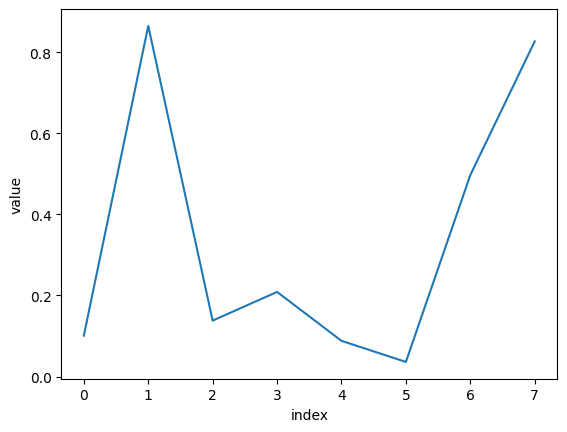

In [11]:
# プロット
sr.plot()
plt.xlabel("index")
plt.ylabel("value")
plt.show()

In [12]:
# Seriesに対しての演算はSeriesで返ってくる
sr < 0.5

0     True
1    False
2     True
3     True
4     True
5     True
6     True
7    False
dtype: bool

In [13]:
# bool型のSeriesをインデックスにすることで、Trueのものだけを抜き出せる
sr[sr < 0.5]

0    0.100830
2    0.138075
3    0.208757
4    0.088073
5    0.036091
6    0.497169
dtype: float64

In [14]:
# indexを日付などにすると時系列が表現できる
sr_time = pd.Series(np.random.randn(10), index=pd.date_range("2017/1/1","2017/1/10", tz="Asia/Tokyo"))
sr_time

2017-01-01 00:00:00+09:00    0.554398
2017-01-02 00:00:00+09:00   -0.842455
2017-01-03 00:00:00+09:00   -1.167190
2017-01-04 00:00:00+09:00   -0.164714
2017-01-05 00:00:00+09:00    0.427509
2017-01-06 00:00:00+09:00    0.387356
2017-01-07 00:00:00+09:00    0.851266
2017-01-08 00:00:00+09:00    0.988950
2017-01-09 00:00:00+09:00    1.450497
2017-01-10 00:00:00+09:00   -2.528746
Freq: D, dtype: float64

In [15]:
# pandasには日付や期間を表すオブジェクトが充実している（これは1秒ごとのインデックスを作ったもの）
pd.date_range("2017/1/1/0:0", "2017/1/1/10:00", freq="S")

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:00:01',
               '2017-01-01 00:00:02', '2017-01-01 00:00:03',
               '2017-01-01 00:00:04', '2017-01-01 00:00:05',
               '2017-01-01 00:00:06', '2017-01-01 00:00:07',
               '2017-01-01 00:00:08', '2017-01-01 00:00:09',
               ...
               '2017-01-01 09:59:51', '2017-01-01 09:59:52',
               '2017-01-01 09:59:53', '2017-01-01 09:59:54',
               '2017-01-01 09:59:55', '2017-01-01 09:59:56',
               '2017-01-01 09:59:57', '2017-01-01 09:59:58',
               '2017-01-01 09:59:59', '2017-01-01 10:00:00'],
              dtype='datetime64[ns]', length=36001, freq='S')

In [16]:
# スライスと同じ記法で日付の範囲を抜き出せる
sr_time["2017/1/5":]

2017-01-05 00:00:00+09:00    0.427509
2017-01-06 00:00:00+09:00    0.387356
2017-01-07 00:00:00+09:00    0.851266
2017-01-08 00:00:00+09:00    0.988950
2017-01-09 00:00:00+09:00    1.450497
2017-01-10 00:00:00+09:00   -2.528746
Freq: D, dtype: float64

<AxesSubplot:>

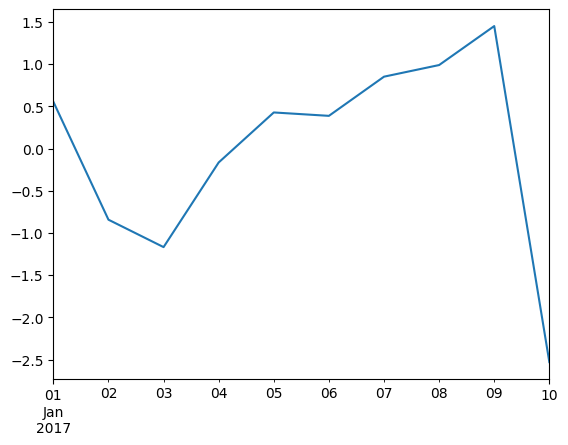

In [17]:
sr_time.plot()

### 欠損値を含む場合
デフォルトだと、平均などは欠損値を覗いて計算されます。  
データが汚い場合でも、データの整理に時間を取られず、本当にやりたい解析に集中することが出来ます。

In [18]:
# ３つ目に欠損値「None」、numpy.nanに変換され、dtypeはfloatとして扱える
sr = pd.Series([1.0, 0.7, None, 3.9, -0.4])
sr

0    1.0
1    0.7
2    NaN
3    3.9
4   -0.4
dtype: float64

In [19]:
# 平均は欠損値を除いて計算されている（大抵の場合、理想的な処理）
sr.mean()

1.2999999999999998

In [20]:
# NaNを0で埋める処理
sr.fillna(0.)

0    1.0
1    0.7
2    0.0
3    3.9
4   -0.4
dtype: float64